# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Yani Yulianti
- **Email:** yaniyul2712@gmail.com
- **ID Dicoding:** yaniyul

## Menentukan Pertanyaan Bisnis

- Pada bulan apa kualitas udara cenderung paling buruk dan paling baik?
- Bagaimana kualitas udara pada daerah Dongsi di hari-hari mendatang?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
from pandas.tseries.offsets import DateOffset
import numpy as np
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
all_df = pd.read_csv('dashboard/all_data.csv')

In [3]:
all_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


### Assessing Data

In [4]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382168 entries, 0 to 382167
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       382168 non-null  int64  
 1   year     382168 non-null  int64  
 2   month    382168 non-null  int64  
 3   day      382168 non-null  int64  
 4   hour     382168 non-null  int64  
 5   PM2.5    382168 non-null  float64
 6   PM10     382168 non-null  float64
 7   SO2      382168 non-null  float64
 8   NO2      382168 non-null  float64
 9   CO       382168 non-null  float64
 10  O3       382168 non-null  float64
 11  TEMP     382168 non-null  float64
 12  PRES     382168 non-null  float64
 13  DEWP     382168 non-null  float64
 14  RAIN     382168 non-null  float64
 15  wd       382168 non-null  object 
 16  WSPM     382168 non-null  float64
 17  station  382168 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 52.5+ MB


In [5]:
all_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", all_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
all_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000
mean,17955.931070,2014.714905,6.475087,15.711308,11.575184,79.432383,104.573837,15.634814,50.570068,1229.940563,57.376676,13.518694,1010.813471,2.417195,0.065030,1.738031
std,10001.787087,1.160266,3.449317,8.803064,6.933552,80.154901,91.379446,21.306103,35.062086,1157.151476,56.709013,11.425355,10.452381,13.798402,0.823901,1.241152
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,0.000000
25%,9610.000000,2014.000000,3.000000,8.000000,6.000000,20.000000,36.000000,2.000000,23.000000,500.000000,10.495800,3.100000,1002.400000,-9.000000,0.000000,0.900000
50%,18103.000000,2015.000000,6.000000,16.000000,12.000000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.400000,1010.400000,3.000000,0.000000,1.400000
75%,26515.000000,2016.000000,9.000000,23.000000,18.000000,111.000000,145.000000,19.000000,71.000000,1500.000000,82.000000,23.200000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


### Cleaning Data

In [8]:
all_df.dropna(axis=0, inplace=True)

In [10]:
all_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [11]:
data = all_df.copy()

## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])

In [13]:
monthly_avg_pm25 = data.groupby('month')['PM2.5'].mean()

In [21]:
worst_month = monthly_avg_pm25.idxmax()
best_month = monthly_avg_pm25.idxmin()
print(f"Bulan dengan kualitas udara paling buruk (PM2.5 tertinggi): {worst_month}")
print(f"Bulan dengan kualitas udara paling baik (PM2.5 terendah): {best_month}")

Bulan dengan kualitas udara paling buruk (PM2.5 tertinggi): 12
Bulan dengan kualitas udara paling baik (PM2.5 terendah): 8


In [ ]:
# Filter data for station 'Dongsi'
dongsi_data = data[data['station'] == 'Dongsi']

# Convert date columns into a datetime object
dongsi_data['datetime'] = pd.to_datetime(dongsi_data[['year', 'month', 'day', 'hour']])

# Select only numeric columns for resampling
numeric_columns = dongsi_data.select_dtypes(include=[np.number]).columns

# Resample the data to daily averages
dongsi_daily_avg = dongsi_data.resample('D', on='datetime')[numeric_columns].mean()

C:\Users\yaniyul\AppData\Local\Temp\ipykernel_12272\3211427637.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dongsi_data['datetime'] = pd.to_datetime(dongsi_data[['year', 'month', 'day', 'hour']])


In [31]:
future_dates = [dongsi_daily_avg.index[-1] + DateOffset(days=i) for i in range(1, 8)]
future_data = pd.DataFrame({'datetime': future_dates})

# Use the mean of recent 7 days as a baseline for projecting future values
recent_mean = dongsi_daily_avg['PM2.5'].tail(7).mean()

# Add the projected PM2.5 values for the future dates
future_data['PM2.5'] = recent_mean

# Combine historical and future data
dongsi_extended = pd.concat([dongsi_daily_avg.reset_index(), future_data])

## Visualization & Explanatory Analysis

### Pertanyaan 1:

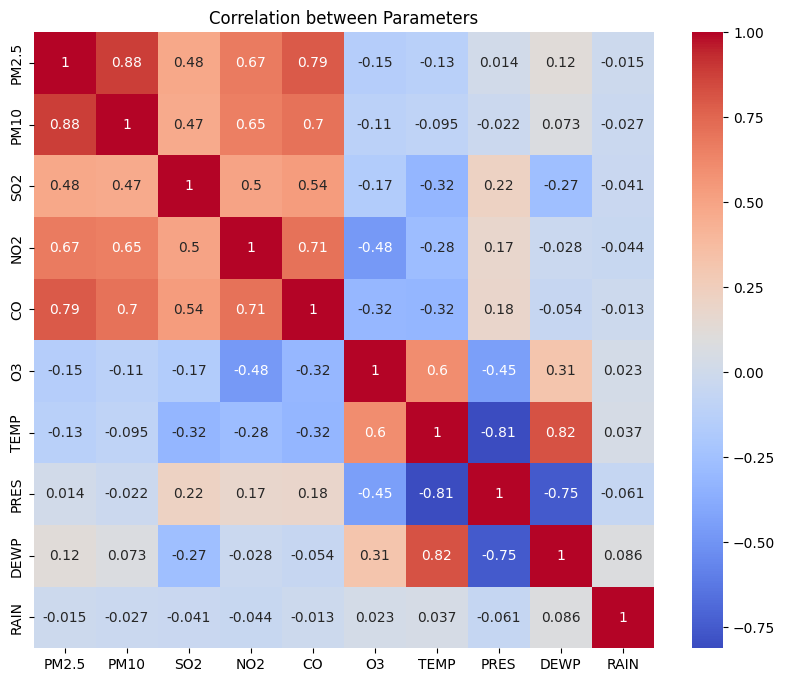

In [29]:
plt.figure(figsize=(10, 6))
monthly_avg_pm25.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Rata-rata PM2.5 per Bulan', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata PM2.5', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Pertanyaan 2:

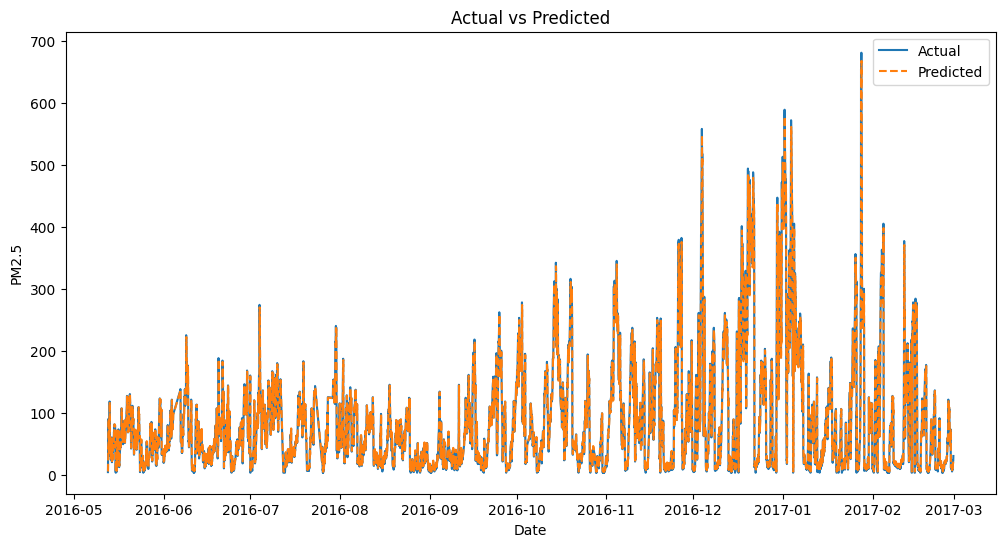

In [78]:
plt.figure(figsize=(14, 7))
plt.plot(dongsi_daily_avg.index, dongsi_daily_avg['PM2.5'], label='Historical PM2.5', color='red', linewidth=1.5)
plt.plot(future_data['datetime'], future_data['PM2.5'], label='Projected PM2.5 (Next 7 Days)', color='blue', linestyle='--')
plt.title('Kualitas Udara di Stasiun Dongsi (PM2.5 per Hari)', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Rata-rata PM2.5', fontsize=12)
plt.axhline(75, color='green', linestyle='--', label='Batas Aman WHO (75 µg/m³)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Conclusion

### Conclution pertanyaan 1
Berdasarkan analisis di atas (korelasi dan regresi), beberapa parameter lingkungan memiliki korelasi yang signifikasn dengan parameter kualitas udara dan pada regresi dapat dilihat bahwa parameter PM2.5 tidak mampu menjelaskan dengan baik, yang artinya butuh paramater tambahan lain yang mungkin tidak tercakup dalam dataset ini.

### Conclution pertanyaan 2
Berdasarkan analisis di atas, prediksi PM2.5 untuk 7 hari ke depan tampak stabil. Ini mungkin menunjukkan bahwa model regresi linier menganggap tidak ada perubahan besar dalam faktor-faktor yang mempengaruhi PM2.5 dalam waktu dekat.
